# Librerias

In [20]:
import gpxpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import haversine as hs
import datetime

## Crear Dataframe del GPX

In [2]:
def read_gpx(file: str) -> pd.DataFrame:
    df = None
    points = []
    with open(file) as f:
        gpx = gpxpy.parse(f)
        
    for segment in gpx.tracks[0].segments:
        for p in segment.points:
            points.append({
                'time': p.time,
                'latitude': p.latitude,
                'longitude': p.longitude,
                'elevation': p.elevation
            })
    df = pd.DataFrame.from_records(points)
    return df

In [3]:
df_route = read_gpx('./RutaCiudad.gpx')
df_route.head()

,time,latitude,longitude,elevation
0,2023-03-29 20:58:51.014000+00:00,6.219227,-75.600520,1629.7
1,2023-03-29 20:59:19+00:00,6.219273,-75.600605,1629.8
2,2023-03-29 20:59:28+00:00,6.219357,-75.600563,1629.6
3,2023-03-29 21:00:00+00:00,6.219273,-75.600607,1580.9
4,2023-03-29 21:00:08+00:00,6.219265,-75.600698,1585.7


In [4]:
def get_dates_time(df):
    df['year'] = pd.DatetimeIndex(df['time']).year
    df['month'] = pd.DatetimeIndex(df['time']).month
    df['day'] = pd.DatetimeIndex(df['time']).day
    df['dif_time'] = df['time'].diff()
    return df

df_route = get_dates_time(df_route)

In [5]:
#Obtener distancias entre puntos
def haversine_distance(lat1, long1, lat2, long2) -> float:
    distance = hs.haversine(
        point1 = (lat1, long1),
        point2 = (lat2, long2),
        unit = hs.Unit.METERS
    )
    return np.round(distance, 2)

In [6]:
def get_distances(df):
    distances = [np.nan]

    for i in range(len(df)):
        if i==0:
            pass
        else:
            distances.append(haversine_distance(
                lat1 = df.iloc[i-1]['latitude'],
                long1 = df.iloc[i-1]['longitude'],
                lat2 = df.iloc[i]['latitude'],
                long2 = df.iloc[i]['longitude']
            ))

        
    df['distance'] = distances
    return df

In [7]:
df_route = get_distances(df_route)
df_route.head()

,time,latitude,longitude,elevation,year,month,day,dif_time,distance
0,2023-03-29 20:58:51.014000+00:00,6.219227,-75.600520,1629.7,2023,3,29,NaT,NaN
1,2023-03-29 20:59:19+00:00,6.219273,-75.600605,1629.8,2023,3,29,0 days 00:00:27.986000,10.73
2,2023-03-29 20:59:28+00:00,6.219357,-75.600563,1629.6,2023,3,29,0 days 00:00:09,10.35
3,2023-03-29 21:00:00+00:00,6.219273,-75.600607,1580.9,2023,3,29,0 days 00:00:32,10.43
4,2023-03-29 21:00:08+00:00,6.219265,-75.600698,1585.7,2023,3,29,0 days 00:00:08,10.17


In [9]:
df_route['distance'] = df_route['distance'].fillna(0)
df_route['dif_time'] = df_route['dif_time'].fillna(pd.Timedelta(0))
df_route.head()

,time,latitude,longitude,elevation,year,month,day,dif_time,distance
0,2023-03-29 20:58:51.014000+00:00,6.219227,-75.600520,1629.7,2023,3,29,0 days 00:00:00,0.00
1,2023-03-29 20:59:19+00:00,6.219273,-75.600605,1629.8,2023,3,29,0 days 00:00:27.986000,10.73
2,2023-03-29 20:59:28+00:00,6.219357,-75.600563,1629.6,2023,3,29,0 days 00:00:09,10.35
3,2023-03-29 21:00:00+00:00,6.219273,-75.600607,1580.9,2023,3,29,0 days 00:00:32,10.43
4,2023-03-29 21:00:08+00:00,6.219265,-75.600698,1585.7,2023,3,29,0 days 00:00:08,10.17


In [10]:
df_route.isnull().sum()

time         0
latitude     0
longitude    0
elevation    0
year         0
month        0
day          0
dif_time     0
distance     0
dtype: int64

In [11]:
seconds_arr = []
a = len(df_route['dif_time'])
for i in range(a):
    #print(df_route['dif_time'][i])
    second = float(str(df_route['dif_time'][i]).split(' ')[-1].split(':')[-1])
    seconds_arr.append(second)

In [12]:
df_route['dif_time'] = seconds_arr
df_route.head()

,time,latitude,longitude,elevation,year,month,day,dif_time,distance
0,2023-03-29 20:58:51.014000+00:00,6.219227,-75.600520,1629.7,2023,3,29,0.000,0.00
1,2023-03-29 20:59:19+00:00,6.219273,-75.600605,1629.8,2023,3,29,27.986,10.73
2,2023-03-29 20:59:28+00:00,6.219357,-75.600563,1629.6,2023,3,29,9.000,10.35
3,2023-03-29 21:00:00+00:00,6.219273,-75.600607,1580.9,2023,3,29,32.000,10.43
4,2023-03-29 21:00:08+00:00,6.219265,-75.600698,1585.7,2023,3,29,8.000,10.17


In [13]:
# cumulative distance and cumulative time
df_route['cum_time'] = df_route['dif_time'].cumsum()
df_route['cum_distance'] = df_route['distance'].cumsum()

In [14]:
#Final DataFrame
df_route.head()

,time,latitude,longitude,elevation,year,month,day,dif_time,distance,cum_time,cum_distance
0,2023-03-29 20:58:51.014000+00:00,6.219227,-75.600520,1629.7,2023,3,29,0.000,0.00,0.000,0.00
1,2023-03-29 20:59:19+00:00,6.219273,-75.600605,1629.8,2023,3,29,27.986,10.73,27.986,10.73
2,2023-03-29 20:59:28+00:00,6.219357,-75.600563,1629.6,2023,3,29,9.000,10.35,36.986,21.08
3,2023-03-29 21:00:00+00:00,6.219273,-75.600607,1580.9,2023,3,29,32.000,10.43,68.986,31.51
4,2023-03-29 21:00:08+00:00,6.219265,-75.600698,1585.7,2023,3,29,8.000,10.17,76.986,41.68


## ¿Preguntas?

En esta sección se realizan preguntas sobre los datos, se sabe que son datos recolectados de una ruta en la tarde, el recorrido se realizo en carro

#### ¿Cuanto tiempo duro el recorrido?

In [40]:
last_cum_time = (df_route['cum_time'].iloc[-1])
total_time = str(datetime.timedelta(seconds = last_cum_time)).rsplit(':', 1)[0]
print(f'El tiempo total transcurrido en el recorrido fueron (hh:mm) {total_time}')

El tiempo total transcurrido en el recorrido fueron (hh:mm) 1:16


#### Distancia total recorrida

In [46]:
last_cum_distance = round((df_route['cum_distance'].iloc[-1])/1000, 2)
print(f'El recorrido total fueron {last_cum_distance} km')

El recorrido total fueron 15.47 km


#### Velocidad promedio en el recorrido

In [56]:
#I'm calculating the speed point by point because as you should know the speed change depending on the traffic and the route...
speed_arr = []
for i in range(a):
    if df_route['dif_time'].iloc[i] == 0:
        speed = 0.0
    else:
        speed = df_route['distance'].iloc[i]/df_route['dif_time'].iloc[i]
    speed_arr.append(speed)
df_route['speed'] = speed_arr

In [69]:
mean_speed = round(df_route['speed'].mean()*(3600/1000),2)
max_speed =  round(df_route['speed'].max()*(3600/1000),2)
min_speed =  round(df_route['speed'].min()*(3600/1000),2)
min_speed2 =  round(df_route['speed'][df_route['speed'] != 0.0].min()*(3600/1000),2)
print(f'La velocidad promedio en el recorrido fue: {mean_speed} km/h\n')
print(f'La velocidad máxima en el recorrido fue: {max_speed} km/h\n')
print(f'La velocidad mínima en el recorrido fue: {min_speed} km/h detenidos y {min_speed2} en movimiento\n')

La velocidad promedio en el recorrido fue: 22.29 km/h

La velocidad máxima en el recorrido fue: 46.76 km/h

La velocidad mínima en el recorrido fue: 0.0 km/h detenidos y 0.77 en movimiento



#### Huella de carbono

In [73]:
#En promdio un carro familiar emite 143.2 g CO2 por km
co2_emited = round((last_cum_distance * 143.2)/1000, 2)
print(f'Este viaje emitio {co2_emited} kg de CO2 a la atmosfera')

Este viaje emitio 2.22 kg de CO2 a la atmosfera


#### Si el recorrido fuera en taxi, cuanto costaria?

In [78]:
# $1094 por km
# $250 cada 60 s
stop_time  = df_route['dif_time'][df_route['speed'] == 0].sum()
total_cost = round(((last_cum_distance*1094) + (stop_time*250)),0)
print(f'En taxi este recorrido tendría un costo aproximado de ${total_cost}')

En taxi este recorrido tendría un costo aproximado de $16924.0


## Visualizaciones de la data

#### Ruta

In [79]:
lat = df_route['latitude'].mean()
long = df_route['longitude'].mean()

In [87]:
route_map = folium.Map(
    location = [lat, long],
    zoom_start = 14,
    tiles = 'OpenStreetMap',
    width = 1024,
    height=600
)

coordinates = [tuple(x) for x in df_route[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)

display(route_map)

#### Distancia vs elevación

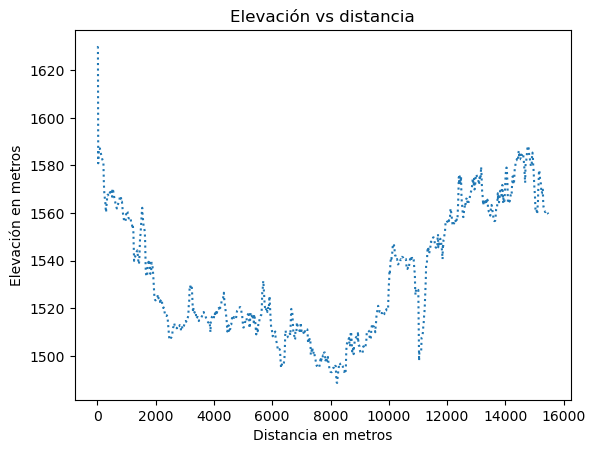

In [84]:
plt.plot(df_route['cum_distance'], df_route['elevation'], linestyle='dotted')
plt.title('Elevación vs distancia')
plt.xlabel('Distancia en metros')
plt.ylabel('Elevación en metros')
plt.show()

#### Velocidades

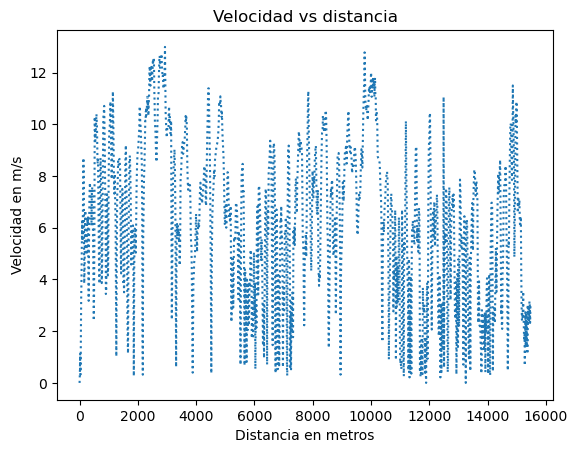

In [94]:
plt.plot(df_route['cum_distance'], df_route['speed'], linestyle='dotted')
plt.title('Velocidad vs distancia')
plt.xlabel('Distancia en metros')
plt.ylabel('Velocidad en m/s')
plt.show()

In [95]:
df_route.to_csv('RutaViaje.csv', index=False)